<a href="https://colab.research.google.com/github/FranziskoB/Regressao_simples_multipla/blob/main/01_Regress%C3%A3o_linear_simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MODELAGEM DE UMA REGRESSÃO LINEAR SIMPLES

## Bibliotecas

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns 

## Importando os dados

In [ ]:
tempodist = pd.read_csv('https://github.com/FranziskoB/Regressao_simples_multipla/raw/main/dados/Stempodist.csv')

In [ ]:
tempodist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tempo      10 non-null     int64
 1   distancia  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [ ]:
tempodist.head(5)

,tempo,distancia
0,15,8
1,20,6
2,20,15
3,40,20
4,50,25


In [ ]:
tempodist.describe()

,tempo,distancia
count,10.00000,10.000000
mean,30.00000,17.000000
std,14.90712,9.510228
min,10.00000,5.000000
25%,20.00000,8.750000
50%,27.50000,17.500000
75%,38.75000,23.750000
max,55.00000,32.000000


In [ ]:
import plotly.express as px
fig = px.scatter(tempodist, x="distancia", y="tempo")
fig.update_layout(
    autosize=False,
    width=600,
    height=400,
    title_text='TempoxDistância'
)
fig.show()

##Estimando o modelo

In [ ]:
# é necessário adicionar uma constante a matriz X
X_sm = sm.add_constant(tempodist.distancia)
Y_sm=tempodist.tempo
# OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
results = sm.OLS(Y_sm, X_sm).fit()


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
# mostrando as estatísticas do modelo
results.summary()

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tempo   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     36.30
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           0.000314
Time:                        19:09:49   Log-Likelihood:                -32.123
No. Observations:                  10   AIC:                             68.25
Df Residuals:                       8   BIC:                             68.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8784      4.532      1.297      0.231      -4.573      16.330
distancia      1.4189      0.235      6.025      0.000       0.876       1.962
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                0.694
Skew:                          -0.262   Prob(JB):                        0.707
Kurtosis:                       1.820   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O modelo apresentou R² = 0.819, intercepto igual a 1.14 e não foi estatisticamente diferente de 0 para nivel de confiança de 95%. O coefiente angular da variável distacia ficou igual a 5.87 e estatíticamente diferente de 0.

In [ ]:
# mostrando as previsões para o mesmo conjunto passado
tempodist['yhat']=results.predict(X_sm)
tempodist['erro']=tempodist['yhat']-tempodist['tempo']

In [ ]:
tempodist

,tempo,distancia,yhat,erro
0,15,8,17.229730,2.229730
1,20,6,14.391892,-5.608108
2,20,15,27.162162,7.162162
3,40,20,34.256757,-5.743243
4,50,25,41.351351,-8.648649
5,25,11,21.486486,-3.513514
6,10,5,12.972973,2.972973
7,55,32,51.283784,-3.716216
8,35,28,45.608108,10.608108
9,30,20,34.256757,4.256757


##Intervalo de confiança da reta

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



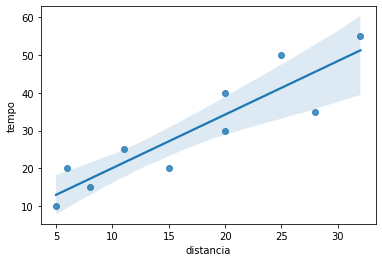

In [ ]:
X=tempodist[['distancia']]
Y=tempodist[['tempo']]
ax = sns.regplot(X, Y, ci=95) # 95% de nivél de confiança

## Realizando predições

Para distancia igual a 25

In [ ]:
def predicao(x,results): # Criando função para realizar a predição e calcular o intervalo de confiança para nivel de confiança de 95% 
  x_pr=pd.DataFrame([x,0],columns=['Distancia'])
  sm_pred = results.get_prediction(sm.add_constant(x_pr))\
                  .summary_frame(alpha=0.05)
  resultado=sm_pred.iloc[0:1]
  resultado=resultado[['mean','mean_ci_lower','mean_ci_upper']]
  resultado.columns=['yhat','Limite_inferior','Limite_Superior']
  resultado['distancia']= x_pr.iloc[0:1].Distancia
  return resultado

In [ ]:
predicao(25,results)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



,yhat,Limite_inferior,Limite_Superior,distancia
0,41.351351,34.803059,47.899644,25
